# Project 1

Predict the stock returns for each firms in s$p400 and s&p500

In [299]:
## Install package ##
from pandas_datareader import data
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Download data of s&p400 and s&p500

In [2]:
## Import data ##
sp400 = pd.read_csv("C:/Users/White/OneDrive/Desktop/s&p project/s&p400.csv")
sp500 = pd.read_csv("C:/Users/White/OneDrive/Desktop/s&p project/s&p500.csv")

In [3]:
# Set tickers #
tickers = sp400.iloc[:, 0]
tickers2 = sp500.iloc[:, 0]

In [58]:
# Set data for 10 year #
start_date = '2009-10-11'
end_date = '2019-10-11'

# Download s$p400 prices from yahoo #
panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)
price1 = panel_data['Adj Close']

In [59]:
price1

Symbols,AAN,AAXN,ACC,ACHC,ACIW,ACM,ADNT,AEO,AFG,AGCO,...,WTR,WW,WWD,WWE,WYND,X,XPO,Y,YELP,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2009-10-12,13.677750,4.570000,18.431793,4.760000,5.690000,26.000000,NaN,12.424039,19.000401,25.325001,...,10.247952,25.366411,23.045650,9.150293,6.438524,38.965038,4.120000,246.196594,NaN,25.990000
2009-10-13,13.677750,4.620000,18.047518,4.960000,5.816667,25.650000,NaN,12.483548,18.861279,25.372032,...,10.260274,25.703259,23.165726,9.217036,6.363616,40.251328,4.120000,240.035309,NaN,25.870001
2009-10-14,13.677750,4.670000,18.532915,5.200000,5.990000,25.670000,NaN,12.708358,19.256664,25.334406,...,10.358872,25.834255,23.729166,9.123598,6.520565,41.381420,4.200000,242.860809,NaN,26.160000
2009-10-15,13.677750,4.660000,18.229546,5.160000,5.896667,26.059999,NaN,12.794312,19.307919,25.325001,...,10.223299,25.965252,23.452065,9.003463,6.509865,41.923492,4.120000,242.851364,NaN,26.100000
2009-10-16,13.677750,4.610000,17.980095,4.800000,5.750000,25.879999,NaN,12.860438,19.124872,25.089808,...,10.260274,25.881041,23.368933,9.190337,6.370751,39.911373,4.200000,236.737320,NaN,26.010000
2009-10-19,14.111861,4.600000,18.411564,4.880000,5.790000,26.180000,NaN,12.972840,19.307919,26.717308,...,10.291088,26.283386,24.015501,9.437285,6.467061,39.112049,4.160000,238.901321,NaN,25.770000
2009-10-20,13.956359,4.520000,17.777847,4.960000,5.683333,25.850000,NaN,12.774481,19.132193,26.999533,...,10.013780,26.180462,23.729166,9.417262,6.310110,38.845612,4.240000,237.086945,NaN,25.730000
2009-10-21,13.956359,4.560000,17.460989,4.760000,5.653333,25.650000,NaN,12.562893,19.110226,27.714502,...,9.909023,26.114962,23.599846,9.363870,6.170996,38.689415,4.160000,235.452133,NaN,25.500000
2009-10-22,13.522245,4.500000,18.040777,4.920000,5.760000,25.690001,NaN,12.900105,19.322569,27.808582,...,9.909023,26.161747,24.006269,9.570767,6.310110,38.248398,4.280000,243.097046,NaN,25.629999


In [60]:
# Set data for 10 year #
startdate = '2009-10-11'
enddate = '2019-10-11'

# Download s&p500 prices from yahoo #
panel_data2 = data.DataReader(tickers2, 'yahoo', startdate, enddate)
price2 = panel_data2['Adj Close']

In [61]:
price2

Symbols,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2009-10-12,18.209461,4.281310,37.296070,23.788916,NaN,19.593874,10.610000,18.646147,31.325556,34.360001,...,13.205138,18.727798,51.075153,33.133263,15.793620,NaN,20.830921,49.003185,15.613506,NaN
2009-10-13,18.096737,4.214859,37.179100,23.690426,NaN,19.490486,10.710000,18.664944,31.254208,34.619999,...,13.307823,18.917524,51.169834,33.105042,15.327914,NaN,20.583353,48.760460,16.550320,NaN
2009-10-14,18.295679,4.252832,38.212395,23.848755,NaN,19.878222,10.950000,19.247641,31.731050,35.430000,...,13.451582,18.972868,52.320545,33.678593,15.631629,NaN,20.642658,48.583069,17.128942,NaN
2009-10-15,18.315565,4.290802,38.378117,23.757746,NaN,20.119488,10.840000,19.514549,31.359268,35.750000,...,13.437890,18.735706,53.121677,33.885437,15.570891,NaN,20.968815,48.676449,17.285070,NaN
2009-10-16,18.043684,4.072465,38.651051,23.444820,NaN,20.274578,10.900000,19.334099,31.617895,35.669998,...,13.451582,18.419489,53.252747,33.800804,15.408905,NaN,20.903578,48.471043,16.688084,NaN
2009-10-19,18.169680,3.968043,38.417107,23.670473,NaN,20.188414,11.100000,19.634846,31.270367,35.650002,...,13.581644,18.711992,53.616894,34.383739,15.793620,NaN,21.241600,48.461708,16.835037,NaN
2009-10-20,17.552967,4.129422,37.432564,24.780069,NaN,20.429678,10.570000,19.495754,30.833921,35.410000,...,13.417351,18.577595,53.179932,33.810219,15.935356,NaN,20.826483,47.565487,15.824752,NaN
2009-10-21,17.824852,3.673762,36.516247,25.548059,NaN,20.222885,10.330000,19.228844,31.027889,34.810001,...,13.437890,18.245573,53.391125,33.603367,15.631629,NaN,20.488470,48.760460,15.365532,NaN
2009-10-22,17.818220,3.664269,36.789181,25.582972,NaN,20.240122,10.570000,19.612295,30.437883,35.169998,...,13.492649,18.506453,54.214104,33.988853,16.259333,NaN,20.755322,51.383793,15.962511,NaN


In [68]:
sp900 = pd.DataFrame()
sp900 = pd.concat([price1, price2], axis =1)
sp900

Symbols,AAN,AAXN,ACC,ACHC,ACIW,ACM,ADNT,AEO,AFG,AGCO,...,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2009-10-12,13.677750,4.570000,18.431793,4.760000,5.690000,26.000000,NaN,12.424039,19.000401,25.325001,...,13.205138,18.727798,51.075153,33.133263,15.793620,NaN,20.830921,49.003185,15.613506,NaN
2009-10-13,13.677750,4.620000,18.047518,4.960000,5.816667,25.650000,NaN,12.483548,18.861279,25.372032,...,13.307823,18.917524,51.169834,33.105042,15.327914,NaN,20.583353,48.760460,16.550320,NaN
2009-10-14,13.677750,4.670000,18.532915,5.200000,5.990000,25.670000,NaN,12.708358,19.256664,25.334406,...,13.451582,18.972868,52.320545,33.678593,15.631629,NaN,20.642658,48.583069,17.128942,NaN
2009-10-15,13.677750,4.660000,18.229546,5.160000,5.896667,26.059999,NaN,12.794312,19.307919,25.325001,...,13.437890,18.735706,53.121677,33.885437,15.570891,NaN,20.968815,48.676449,17.285070,NaN
2009-10-16,13.677750,4.610000,17.980095,4.800000,5.750000,25.879999,NaN,12.860438,19.124872,25.089808,...,13.451582,18.419489,53.252747,33.800804,15.408905,NaN,20.903578,48.471043,16.688084,NaN
2009-10-19,14.111861,4.600000,18.411564,4.880000,5.790000,26.180000,NaN,12.972840,19.307919,26.717308,...,13.581644,18.711992,53.616894,34.383739,15.793620,NaN,21.241600,48.461708,16.835037,NaN
2009-10-20,13.956359,4.520000,17.777847,4.960000,5.683333,25.850000,NaN,12.774481,19.132193,26.999533,...,13.417351,18.577595,53.179932,33.810219,15.935356,NaN,20.826483,47.565487,15.824752,NaN
2009-10-21,13.956359,4.560000,17.460989,4.760000,5.653333,25.650000,NaN,12.562893,19.110226,27.714502,...,13.437890,18.245573,53.391125,33.603367,15.631629,NaN,20.488470,48.760460,15.365532,NaN
2009-10-22,13.522245,4.500000,18.040777,4.920000,5.760000,25.690001,NaN,12.900105,19.322569,27.808582,...,13.492649,18.506453,54.214104,33.988853,16.259333,NaN,20.755322,51.383793,15.962511,NaN


In [588]:
## Export s&p900 in csv file ##
sp900.to_csv('s&p900.csv')

In [72]:
## Calculate stock return ##
number = len(price1.columns)
sp400_ret = pd.DataFrame()
for i in range(number):
    ret = price1.iloc[:,i].pct_change()
    sp400_ret[price1.columns[i]] = ret

In [76]:
sp400_ret.head(10)

,AAN,AAXN,ACC,ACHC,ACIW,ACM,ADNT,AEO,AFG,AGCO,...,WTR,WW,WWD,WWE,WYND,X,XPO,Y,YELP,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2009-10-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-10-13,0.000000,0.010941,-0.020849,0.042017,0.022261,-0.013462,NaN,0.004790,-0.007322,0.001857,...,0.001202,0.013279,0.005210,0.007294,-0.011634,0.033011,0.000000,-0.025026,NaN,-0.004617
2009-10-14,0.000000,0.010823,0.026896,0.048387,0.029799,0.000780,NaN,0.018008,0.020963,-0.001483,...,0.009610,0.005097,0.024322,-0.010138,0.024664,0.028076,0.019417,0.011771,NaN,0.011210
2009-10-15,0.000000,-0.002141,-0.016369,-0.007692,-0.015582,0.015193,NaN,0.006764,0.002662,-0.000371,...,-0.013088,0.005071,-0.011678,-0.013168,-0.001641,0.013099,-0.019048,-0.000039,NaN,-0.002294
2009-10-16,0.000000,-0.010730,-0.013684,-0.069767,-0.024873,-0.006907,NaN,0.005168,-0.009480,-0.009287,...,0.003617,-0.003243,-0.003545,0.020756,-0.021370,-0.047995,0.019417,-0.025176,NaN,-0.003448
2009-10-19,0.031739,-0.002169,0.023997,0.016667,0.006957,0.011592,NaN,0.008740,0.009571,0.064867,...,0.003003,0.015546,0.027668,0.026870,0.015118,-0.020027,-0.009524,0.009141,NaN,-0.009227
2009-10-20,-0.011019,-0.017391,-0.034419,0.016393,-0.018423,-0.012605,NaN,-0.015290,-0.009101,0.010563,...,-0.026946,-0.003916,-0.011923,-0.002122,-0.024269,-0.006812,0.019231,-0.007595,NaN,-0.001552
2009-10-21,0.000000,0.008850,-0.017823,-0.040323,-0.005279,-0.007737,NaN,-0.016563,-0.001148,0.026481,...,-0.010461,-0.002502,-0.005450,-0.005670,-0.022046,-0.004021,-0.018868,-0.006895,NaN,-0.008939
2009-10-22,-0.031105,-0.013158,0.033205,0.033613,0.018868,0.001559,NaN,0.026842,0.011111,0.003395,...,0.000000,0.001792,0.017221,0.022095,0.022543,-0.011399,0.028846,0.032469,NaN,0.005098


In [74]:
number = len(price2.columns)
sp500_ret = pd.DataFrame()
for i in range(number):
    ret = price2.iloc[:,i].pct_change()
    sp500_ret[price2.columns[i]] = ret

In [77]:
sp500_ret.head(10)

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2009-10-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-10-13,-0.006190,-0.015521,-0.003136,-0.004140,NaN,-0.005277,0.009425,0.001008,-0.002278,0.007567,...,0.007776,0.010131,0.001854,-0.000852,-0.029487,NaN,-0.011885,-0.004953,0.060000,NaN
2009-10-14,0.010993,0.009009,0.027792,0.006683,NaN,0.019894,0.022409,0.031219,0.015257,0.023397,...,0.010803,0.002926,0.022488,0.017325,0.019814,NaN,0.002881,-0.003638,0.034961,NaN
2009-10-15,0.001087,0.008928,0.004337,-0.003816,NaN,0.012137,-0.010046,0.013867,-0.011717,0.009032,...,-0.001018,-0.012500,0.015312,0.006142,-0.003886,NaN,0.015800,0.001922,0.009115,NaN
2009-10-16,-0.014844,-0.050885,0.007112,-0.013172,NaN,0.007708,0.005535,-0.009247,0.008247,-0.002238,...,0.001019,-0.016878,0.002467,-0.002498,-0.010403,NaN,-0.003111,-0.004220,-0.034538,NaN
2009-10-19,0.006983,-0.025641,-0.006053,0.009625,NaN,-0.004250,0.018349,0.015555,-0.010992,-0.000561,...,0.009669,0.015880,0.006838,0.017246,0.024967,NaN,0.016171,-0.000193,0.008806,NaN
2009-10-20,-0.033942,0.040670,-0.025628,0.046877,NaN,0.011951,-0.047748,-0.007084,-0.013957,-0.006732,...,-0.012097,-0.007182,-0.008150,-0.016680,0.008974,NaN,-0.019543,-0.018493,-0.060011,NaN
2009-10-21,0.015489,-0.110345,-0.024479,0.030992,NaN,-0.010122,-0.022706,-0.013691,0.006291,-0.016944,...,0.001531,-0.017872,0.003971,-0.006118,-0.019060,NaN,-0.016230,0.025123,-0.029019,NaN
2009-10-22,-0.000372,-0.002584,0.007474,0.001367,NaN,0.000852,0.023233,0.019941,-0.019015,0.010342,...,0.004075,0.014298,0.015414,0.011472,0.040156,NaN,0.013024,0.053800,0.038852,NaN


# Check Stationarity

In [8]:
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [78]:
# Prepare data for checking #
check400 = sp400_ret
check500 = sp500_ret

KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test

The null hypothesis means stationary. Alternative hypothesis means the data has unit root or non-stationary. 


In [79]:
number = len(check400.columns)
kpss_sta400 = pd.DataFrame()
kpss_unsta400 = pd.DataFrame()
for i in range(number):
    check = check400.iloc[:,i]
    check = check.dropna()
    test = kpss(check,regression='ct')
    if test[1] >= 0.05:
        kpss_sta400[price1.columns[i]] = price1.iloc[:,i]
    else:
        kpss_unsta400[price1.columns[i]] = price1.iloc[:,i]

D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is grea

D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is grea

D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is grea

D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is grea

D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is grea

D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is grea

In [80]:
number = len(check500.columns)
kpss_sta500 = pd.DataFrame()
kpss_unsta500 = pd.DataFrame()
for i in range(number):
    check = check500.iloc[:,i]
    check = check.dropna()
    test = kpss(check,regression='ct')
    if test[1] >= 0.05:
        kpss_sta500[price2.columns[i]] = price2.iloc[:,i]
    else:
        kpss_unsta500[price2.columns[i]] = price2.iloc[:,i]

D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is grea

D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is grea

D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is grea

D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is grea

D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is grea

D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is grea

D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is grea

D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is grea

Augmented Dickey-Fuller test

If p-value is greater than 0.05 then we cannot reject the null hypothesis because the data has unit root, it is non-stationary.
If p-value is less than 0.05 then we can reject the null hypothesis, it is stationary.

In [81]:
# Test ADF after KPSS #
number = len(kpss_sta400.columns)
both_sta400 = pd.DataFrame()
kpss_sta_adf_unsta400 = pd.DataFrame()
for i in range(number):
    check = kpss_sta400.iloc[:,i]
    check = check.dropna()
    test2 = adfuller(check)
    if test2[1] >= 0.05:
        kpss_sta_adf_unsta400[kpss_sta400.columns[i]] = kpss_sta400.iloc[:,i]
    else:
        both_sta400[kpss_sta400.columns[i]] = kpss_sta400.iloc[:,i]

In [82]:
## Trend stationary ##
# Have to remove trend #
kpss_sta_adf_unsta400.head(10)

,AAN,AAXN,ACC,ACHC,ACIW,ACM,ADNT,AEO,AFG,AGCO,...,WTR,WW,WWD,WWE,WYND,X,XPO,Y,YELP,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2009-10-12,13.677750,4.57,18.431793,4.76,5.690000,26.000000,NaN,12.424039,19.000401,25.325001,...,10.247952,25.366411,23.045650,9.150293,6.438524,38.965038,4.12,246.196594,NaN,25.990000
2009-10-13,13.677750,4.62,18.047518,4.96,5.816667,25.650000,NaN,12.483548,18.861279,25.372032,...,10.260274,25.703259,23.165726,9.217036,6.363616,40.251328,4.12,240.035309,NaN,25.870001
2009-10-14,13.677750,4.67,18.532915,5.20,5.990000,25.670000,NaN,12.708358,19.256664,25.334406,...,10.358872,25.834255,23.729166,9.123598,6.520565,41.381420,4.20,242.860809,NaN,26.160000
2009-10-15,13.677750,4.66,18.229546,5.16,5.896667,26.059999,NaN,12.794312,19.307919,25.325001,...,10.223299,25.965252,23.452065,9.003463,6.509865,41.923492,4.12,242.851364,NaN,26.100000
2009-10-16,13.677750,4.61,17.980095,4.80,5.750000,25.879999,NaN,12.860438,19.124872,25.089808,...,10.260274,25.881041,23.368933,9.190337,6.370751,39.911373,4.20,236.737320,NaN,26.010000
2009-10-19,14.111861,4.60,18.411564,4.88,5.790000,26.180000,NaN,12.972840,19.307919,26.717308,...,10.291088,26.283386,24.015501,9.437285,6.467061,39.112049,4.16,238.901321,NaN,25.770000
2009-10-20,13.956359,4.52,17.777847,4.96,5.683333,25.850000,NaN,12.774481,19.132193,26.999533,...,10.013780,26.180462,23.729166,9.417262,6.310110,38.845612,4.24,237.086945,NaN,25.730000
2009-10-21,13.956359,4.56,17.460989,4.76,5.653333,25.650000,NaN,12.562893,19.110226,27.714502,...,9.909023,26.114962,23.599846,9.363870,6.170996,38.689415,4.16,235.452133,NaN,25.500000
2009-10-22,13.522245,4.50,18.040777,4.92,5.760000,25.690001,NaN,12.900105,19.322569,27.808582,...,9.909023,26.161747,24.006269,9.570767,6.310110,38.248398,4.28,243.097046,NaN,25.629999


In [83]:
number = len(kpss_unsta400.columns)
kpss_unsta_adf_sta400 = pd.DataFrame()
both_unsta400 = pd.DataFrame()
for i in range(number):
    check = kpss_unsta400.iloc[:,i]
    check = check.dropna()
    test2 = adfuller(check)
    if test2[1] >= 0.05:
        both_unsta400[kpss_unsta400.columns[i]] = kpss_unsta400.iloc[:,i]
    else:
        kpss_unsta_adf_sta400[kpss_unsta400.columns[i]] = kpss_unsta400.iloc[:,i]

In [84]:
## Difference Stationary ##
# Have to do differecing #
kpss_unsta_adf_sta400.head(10)

""


In [89]:
both_unsta400.tail(10)

,GDOT,LIVN,PEN
Date,,,
2019-09-30,25.250000,73.790001,134.490005
2019-10-01,24.660000,71.940002,134.809998
2019-10-02,23.500000,69.290001,135.509995
2019-10-03,23.110001,70.669998,139.199997
2019-10-04,23.750000,71.349998,146.070007
2019-10-07,23.299999,71.089996,143.600006
2019-10-08,22.469999,68.919998,137.789993
2019-10-09,22.770000,69.559998,142.289993
2019-10-10,23.070000,69.519997,142.710007


In [90]:
number = len(kpss_sta500.columns)
both_sta500 = pd.DataFrame()
kpss_sta_adf_unsta500 = pd.DataFrame()
for i in range(number):
    check = kpss_sta500.iloc[:,i]
    check = check.dropna()
    test2 = adfuller(check)
    if test2[1] >= 0.05:
        kpss_sta_adf_unsta500[kpss_sta500.columns[i]] = kpss_sta500.iloc[:,i]
    else:
        both_sta500[kpss_sta500.columns[i]] = kpss_sta500.iloc[:,i]

In [91]:
## Trend stationary ##
# Have to remove trend #
kpss_sta_adf_unsta500.head(10)

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2009-10-12,18.209461,4.281310,37.296070,23.788916,NaN,19.593874,10.61,18.646147,31.325556,34.360001,...,13.205138,18.727798,51.075153,33.133263,15.793620,NaN,20.830921,49.003185,15.613506,NaN
2009-10-13,18.096737,4.214859,37.179100,23.690426,NaN,19.490486,10.71,18.664944,31.254208,34.619999,...,13.307823,18.917524,51.169834,33.105042,15.327914,NaN,20.583353,48.760460,16.550320,NaN
2009-10-14,18.295679,4.252832,38.212395,23.848755,NaN,19.878222,10.95,19.247641,31.731050,35.430000,...,13.451582,18.972868,52.320545,33.678593,15.631629,NaN,20.642658,48.583069,17.128942,NaN
2009-10-15,18.315565,4.290802,38.378117,23.757746,NaN,20.119488,10.84,19.514549,31.359268,35.750000,...,13.437890,18.735706,53.121677,33.885437,15.570891,NaN,20.968815,48.676449,17.285070,NaN
2009-10-16,18.043684,4.072465,38.651051,23.444820,NaN,20.274578,10.90,19.334099,31.617895,35.669998,...,13.451582,18.419489,53.252747,33.800804,15.408905,NaN,20.903578,48.471043,16.688084,NaN
2009-10-19,18.169680,3.968043,38.417107,23.670473,NaN,20.188414,11.10,19.634846,31.270367,35.650002,...,13.581644,18.711992,53.616894,34.383739,15.793620,NaN,21.241600,48.461708,16.835037,NaN
2009-10-20,17.552967,4.129422,37.432564,24.780069,NaN,20.429678,10.57,19.495754,30.833921,35.410000,...,13.417351,18.577595,53.179932,33.810219,15.935356,NaN,20.826483,47.565487,15.824752,NaN
2009-10-21,17.824852,3.673762,36.516247,25.548059,NaN,20.222885,10.33,19.228844,31.027889,34.810001,...,13.437890,18.245573,53.391125,33.603367,15.631629,NaN,20.488470,48.760460,15.365532,NaN
2009-10-22,17.818220,3.664269,36.789181,25.582972,NaN,20.240122,10.57,19.612295,30.437883,35.169998,...,13.492649,18.506453,54.214104,33.988853,16.259333,NaN,20.755322,51.383793,15.962511,NaN


In [92]:
number = len(kpss_unsta500.columns)
kpss_unsta_adf_sta500 = pd.DataFrame()
both_unsta500 = pd.DataFrame()
for i in range(number):
    check = kpss_unsta500.iloc[:,i]
    check = check.dropna()
    test2 = adfuller(check)
    if test2[1] >= 0.05:
        both_unsta500[kpss_unsta500.columns[i]] = kpss_unsta500.iloc[:,i]
    else:
        kpss_unsta_adf_sta500[kpss_unsta500.columns[i]] = kpss_unsta500.iloc[:,i]

In [93]:
## Difference Stationary ##
# Have to do differecing #
kpss_unsta_adf_sta500.head(10)

""


In [94]:
both_unsta500.head(10)

,CMG,DXC,EA,GILD,TAP
Date,,,,,
2009-10-12,90.739998,14.859475,20.580000,19.973974,39.106316
2009-10-13,91.720001,14.859475,20.770000,20.146389,39.521507
2009-10-14,92.250000,15.330177,20.910000,20.358601,39.427505
2009-10-15,91.029999,15.076509,20.350000,20.615013,39.341335
2009-10-16,90.529999,14.958127,20.559999,20.411652,39.129810
2009-10-19,91.449997,15.124422,20.830000,20.694590,39.388336
2009-10-20,89.139999,14.955310,19.969999,20.389540,39.388336
2009-10-21,85.480003,14.856655,19.730000,20.040287,39.161152
2009-10-22,89.519997,14.969405,19.959999,19.717554,39.552845


# Differencing

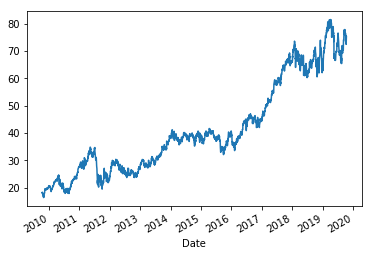

In [96]:
## Sample of Differencing ##
# Before #
kpss_sta_adf_unsta500['A'].plot()

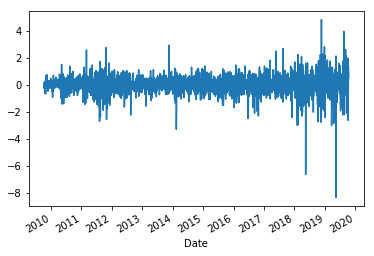

In [97]:
# After #
x = kpss_sta_adf_unsta500['A'] - kpss_sta_adf_unsta500['A'].shift(1)
x.dropna().plot()

In [116]:
# Prepare data #
dif = pd.DataFrame()
dif = pd.concat([kpss_sta_adf_unsta400,both_unsta400,kpss_sta_adf_unsta500,both_unsta500],  axis =1)
dif.head(10)

,AAN,AAXN,ACC,ACHC,ACIW,ACM,ADNT,AEO,AFG,AGCO,...,XYL,YUM,ZBH,ZION,ZTS,CMG,DXC,EA,GILD,TAP
Date,,,,,,,,,,,,,,,,,,,,,
2009-10-12,13.677750,4.57,18.431793,4.76,5.690000,26.000000,NaN,12.424039,19.000401,25.325001,...,NaN,20.830921,49.003185,15.613506,NaN,90.739998,14.859475,20.580000,19.973974,39.106316
2009-10-13,13.677750,4.62,18.047518,4.96,5.816667,25.650000,NaN,12.483548,18.861279,25.372032,...,NaN,20.583353,48.760460,16.550320,NaN,91.720001,14.859475,20.770000,20.146389,39.521507
2009-10-14,13.677750,4.67,18.532915,5.20,5.990000,25.670000,NaN,12.708358,19.256664,25.334406,...,NaN,20.642658,48.583069,17.128942,NaN,92.250000,15.330177,20.910000,20.358601,39.427505
2009-10-15,13.677750,4.66,18.229546,5.16,5.896667,26.059999,NaN,12.794312,19.307919,25.325001,...,NaN,20.968815,48.676449,17.285070,NaN,91.029999,15.076509,20.350000,20.615013,39.341335
2009-10-16,13.677750,4.61,17.980095,4.80,5.750000,25.879999,NaN,12.860438,19.124872,25.089808,...,NaN,20.903578,48.471043,16.688084,NaN,90.529999,14.958127,20.559999,20.411652,39.129810
2009-10-19,14.111861,4.60,18.411564,4.88,5.790000,26.180000,NaN,12.972840,19.307919,26.717308,...,NaN,21.241600,48.461708,16.835037,NaN,91.449997,15.124422,20.830000,20.694590,39.388336
2009-10-20,13.956359,4.52,17.777847,4.96,5.683333,25.850000,NaN,12.774481,19.132193,26.999533,...,NaN,20.826483,47.565487,15.824752,NaN,89.139999,14.955310,19.969999,20.389540,39.388336
2009-10-21,13.956359,4.56,17.460989,4.76,5.653333,25.650000,NaN,12.562893,19.110226,27.714502,...,NaN,20.488470,48.760460,15.365532,NaN,85.480003,14.856655,19.730000,20.040287,39.161152
2009-10-22,13.522245,4.50,18.040777,4.92,5.760000,25.690001,NaN,12.900105,19.322569,27.808582,...,NaN,20.755322,51.383793,15.962511,NaN,89.519997,14.969405,19.959999,19.717554,39.552845


In [117]:
number = len(dif.columns)
adj_sta = pd.DataFrame()
for i in range(number):
    adj = dif.iloc[:,i] - dif.iloc[:,i].shift(1)
    adj_sta[dif.columns[i]] = adj

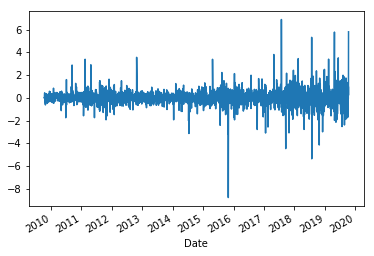

In [118]:
adj_sta['AAN'].dropna().plot()

Test stationary after do differencing

In [122]:
number = len(adj_sta.columns)
test_sta = pd.DataFrame()
test_unsta = pd.DataFrame()
for i in range(number):
    check = adj_sta.iloc[:,i]
    check = check.dropna()
    test = kpss(check,regression='ct')
    if test[1] >= 0.05:
        test_sta[adj_sta.columns[i]] = adj_sta.iloc[:,i]
    else:
        test_unsta[adj_sta.columns[i]] = adj_sta.iloc[:,i]

D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is grea

D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is grea

D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is grea

D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is grea

D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is grea

D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is grea

D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is grea

D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is grea

D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is grea

D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is grea

D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is grea

D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is grea

D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is grea

In [124]:
test_unsta.tail(10)

,ADNT,CC,ICUI,TDY,GDOT,ABMD,MHK,WRK,CMG,DXC,TAP
Date,,,,,,,,,,,
2019-09-30,0.009998,0.429999,3.180008,1.099976,0.020000,2.000000,0.489998,-0.029999,21.639954,-0.280001,0.029999
2019-10-01,-0.730000,-0.960000,-3.550003,-4.949982,-0.590000,-7.679993,-2.800003,-1.590000,-11.629944,-1.420000,0.610001
2019-10-02,-1.139999,-0.450000,0.149994,-1.540009,-1.160000,-6.820007,-2.289993,-0.930000,-18.860046,-0.990000,-1.389999
2019-10-03,0.000000,0.120000,-0.119995,-2.600006,-0.389999,3.639999,2.969994,-0.459999,5.309998,0.150000,-0.100002
2019-10-04,-1.480000,-0.379999,1.779999,5.500000,0.639999,2.220001,2.110001,0.599998,8.640015,0.030001,0.010002
2019-10-07,0.309999,0.080000,0.500000,-1.059998,-0.450001,-4.820007,0.000000,-0.060001,-9.770020,-0.320000,-0.460003
2019-10-08,-0.180000,-0.230000,-4.059998,-3.339996,-0.830000,-4.939987,-1.750000,-0.439999,-8.279968,-0.620001,-0.829998
2019-10-09,0.639999,0.280000,-0.250000,6.679993,0.300001,-0.180008,0.820000,0.430000,21.409973,0.059999,0.169998
2019-10-10,0.410002,0.460000,-1.570007,5.070007,0.299999,3.029999,0.280006,1.410000,0.460022,0.200001,0.210003


In [125]:
number = len(test_unsta.columns)
test2_sta = pd.DataFrame()
test2_unsta = pd.DataFrame()
for i in range(number):
    check = test_unsta.iloc[:,i]
    check = check.dropna()
    test2 = adfuller(check)
    if test2[1] >= 0.05:
        test2_unsta[test_unsta.columns[i]] = test_unsta.iloc[:,i]
    else:
        test2_sta[test_unsta.columns[i]] = test_unsta.iloc[:,i]

In [130]:
test2_sta.head(10)

,ADNT,CC,ICUI,TDY,GDOT,ABMD,MHK,WRK,CMG,DXC,TAP
Date,,,,,,,,,,,
2009-10-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-10-13,NaN,NaN,-0.209999,-0.010002,NaN,0.100000,0.709999,NaN,0.980003,0.000000,0.415192
2009-10-14,NaN,NaN,-0.030003,1.110001,NaN,0.240000,1.639999,NaN,0.529999,0.470702,-0.094002
2009-10-15,NaN,NaN,-0.020000,0.430000,NaN,-0.110000,0.099998,NaN,-1.220001,-0.253669,-0.086170
2009-10-16,NaN,NaN,-0.160000,-2.250000,NaN,0.059999,-0.959999,NaN,-0.500000,-0.118382,-0.211525
2009-10-19,NaN,NaN,0.010002,-0.230000,NaN,0.200001,0.750000,NaN,0.919998,0.166295,0.258526
2009-10-20,NaN,NaN,2.070000,-0.520000,NaN,-0.530001,-2.169998,NaN,-2.309998,-0.169112,0.000000
2009-10-21,NaN,NaN,-0.500000,-0.809998,NaN,-0.240000,-1.870003,NaN,-3.659996,-0.098655,-0.227184
2009-10-22,NaN,NaN,-0.180000,0.980000,NaN,0.240000,1.680000,NaN,4.039993,0.112750,0.391693


In [133]:
test2_unsta.head(10)

""


In [134]:
number = len(test_unsta.columns)
adj2_sta = pd.DataFrame()
for i in range(number):
    adj2 = test_unsta.iloc[:,i] - test_unsta.iloc[:,i].shift(1)
    adj2_sta[test_unsta.columns[i]] = adj2

In [135]:
number = len(adj2_sta.columns)
test3_sta = pd.DataFrame()
test3_unsta = pd.DataFrame()
for i in range(number):
    check = adj2_sta.iloc[:,i]
    check = check.dropna()
    test = kpss(check,regression='ct')
    if test[1] >= 0.05:
        test3_sta[adj2_sta.columns[i]] = adj2_sta.iloc[:,i]
    else:
        test3_unsta[adj2_sta.columns[i]] = adj2_sta.iloc[:,i]

D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is grea

In [136]:
test3_unsta

""


In [566]:
data_sta = pd.DataFrame()
data_sta = pd.concat([both_sta400,both_sta500,test_sta,test3_sta],axis=1, sort=True)
data_sta.sort_index(axis=1, inplace = True)
data_sta.head(10)

,A,AAL,AAN,AAP,AAPL,AAXN,ABBV,ABC,ABMD,ABT,...,XRAY,XRX,XYL,Y,YELP,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2009-10-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-10-13,-0.112724,-0.066451,0.000000,-0.116970,-0.098490,0.05,NaN,-0.103388,NaN,0.018797,...,-0.028221,-0.465706,NaN,-6.161285,NaN,-0.247568,-0.242725,-0.119999,0.936813,NaN
2009-10-14,0.198942,0.037973,0.000000,1.033295,0.158329,0.05,NaN,0.387735,0.139999,0.582697,...,0.573551,0.303715,NaN,2.825500,NaN,0.059305,-0.177391,0.289999,0.578623,NaN
2009-10-15,0.019886,0.037971,0.000000,0.165722,-0.091009,-0.01,NaN,0.241266,-0.349999,0.266909,...,0.206844,-0.060738,NaN,-0.009445,NaN,0.326157,0.093380,-0.059999,0.156128,NaN
2009-10-16,-0.271881,-0.218337,0.000000,0.272934,-0.312925,-0.05,NaN,0.155090,0.169999,-0.180450,...,-0.084633,-0.161986,NaN,-6.114044,NaN,-0.065237,-0.205406,-0.090000,-0.596987,NaN
2009-10-19,0.125996,-0.104423,0.434112,-0.233944,0.225653,-0.01,NaN,-0.086164,0.140001,0.300747,...,0.582935,0.384715,NaN,2.164001,NaN,0.338022,-0.009335,-0.240000,0.146954,NaN
2009-10-20,-0.616713,0.161379,-0.155502,-0.984543,1.109596,-0.08,NaN,0.241264,-0.730001,-0.139091,...,-0.573521,0.141736,NaN,-1.814377,NaN,-0.415117,-0.896221,-0.040001,-1.010285,NaN
2009-10-21,0.271885,-0.455660,0.000000,-0.916317,0.767990,0.04,NaN,-0.206793,0.290001,-0.266911,...,-0.206852,-0.303727,NaN,-1.634811,NaN,-0.338013,1.194973,-0.230000,-0.459220,NaN
2009-10-22,-0.006632,-0.009492,-0.434114,0.272934,0.034912,-0.06,NaN,0.017237,0.480000,0.383451,...,0.385487,0.627704,NaN,7.644913,NaN,0.266851,2.623333,0.129999,0.596979,NaN


Prediction Model

In [192]:
from sklearn.linear_model import LinearRegression as Lr
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Linear Regression Model

In [367]:
data = data_sta
number = len(data_sta.columns)
predict_sp = pd.DataFrame()
confid = pd.DataFrame()
sample = int(10)
for i in range(number):
    data['Prediction'] = data.iloc[:,i].shift(-sample)
    mean = np.mean(data.iloc[:,i])
    
    # Set parameter X,Y #
    X = np.array(data.drop(['Prediction'],1))
    X = preprocessing.scale(X)
    Xpredict = X[-sample:]
    X = X[:-sample]
    Y = np.array(data['Prediction'])
    Y = Y[:-sample]
    
    # Provide Test and Train #
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2)
    
    # Clean 'nan' by mean of data #
    X_train = np.nan_to_num(X_train, mean)
    X_test = np.nan_to_num(X_test ,  mean)
    Y_train = np.nan_to_num(Y_train , mean)
    Y_test = np.nan_to_num(Y_test , mean)
    Xpredict = np.nan_to_num(Xpredict , mean)
    
    # Train linear model #
    model = Lr()
    model.fit(X_train,Y_train)
    
    # Test for confidence #
    confidence = model.score(X_test,Y_test)
    
    # Predict data for next 10 days #
    predict = model.predict(Xpredict)
    
    # export result #
    predict_sp[data_sta.columns[i]] = predict
    

In [369]:
predict_sp

,A,AAL,AAN,AAP,AAPL,AAXN,ABBV,ABC,ABMD,ABT,...,XRAY,XRX,XYL,Y,YELP,YUM,ZBH,ZBRA,ZION,ZTS
0,0.178035,0.799213,1.170036,-0.446856,-2.624107,2.203953,0.778838,-1.497626,1.782572,0.694255,...,0.284847,0.490331,-0.910616,-0.791338,-1.457020,-1.342656,0.278191,-2.310488,0.397648,-0.744716
1,-1.019084,2.872080,-1.229715,4.018314,-1.224260,0.586500,1.014385,3.417335,3.327014,-0.924568,...,0.478212,-0.618331,0.240641,5.551059,1.568477,1.679205,1.066071,1.990860,-1.621177,-0.804808
2,-1.057772,1.844725,-0.335790,2.675255,1.175178,-0.210707,0.642930,0.485705,6.619520,-0.676224,...,-1.107190,0.752855,-0.653072,-4.548296,-1.988122,0.834551,-1.848592,-3.610822,0.488200,-1.182440
3,-0.458906,-0.868964,-0.644908,-2.722310,0.395415,0.516520,-0.107919,1.477805,-4.678473,-1.596162,...,-0.253203,0.760862,-1.295448,-4.088252,3.754894,0.219849,-0.558033,-4.879007,0.166344,-0.112537
4,0.055334,0.677954,0.660963,2.117300,1.913423,0.461521,-0.039464,0.099502,-5.295952,0.311739,...,-0.274779,-0.534130,0.401319,-11.468636,0.126479,0.766024,-0.604017,0.696356,0.253757,0.154194
5,0.525500,-1.023014,0.629747,-1.888919,0.844789,-0.675351,-0.346284,0.345014,4.390183,1.051459,...,0.765883,0.247852,-0.729565,-0.067953,-1.661149,0.669575,0.513446,-0.433676,-0.515385,0.392956
6,-0.892878,1.917589,2.335997,0.602725,1.754551,0.454678,0.323472,0.746223,6.993233,-0.834188,...,-0.272890,1.481487,0.435687,6.198348,-1.229808,-0.345346,-1.969849,3.539105,0.390860,-1.640624
7,0.321755,-1.725615,-1.041289,0.538757,0.604939,0.157788,-0.701699,0.158425,-10.690372,0.014638,...,0.699331,0.165687,0.126053,-2.431050,0.186908,-0.770483,0.232497,-0.215152,-0.549574,0.497403
8,0.264167,-1.646463,0.177206,0.836384,0.681081,2.103022,1.537576,0.805078,-10.888019,0.330682,...,0.888663,1.075619,0.311810,7.485611,1.531905,0.608360,0.852502,5.035607,0.143531,1.189084
9,0.104882,-1.604181,-2.356057,-0.434100,-2.465110,-1.004498,-0.721157,-1.612946,1.397876,-0.464609,...,-0.296883,-0.052366,0.819031,-3.825883,-0.194212,0.794534,0.311671,2.766321,-0.574586,1.305970


In [657]:
i = 4 # AAPL
data['Prediction'] = data.iloc[:,i].shift(-sample)
mean = np.mean(data.iloc[:,i])
    
    # Set parameter X,Y #
X = np.array(data.drop(['Prediction'],1))
X = preprocessing.scale(X)
Xpredict = X
X = X[:-sample]
Y = np.array(data['Prediction'])
Y = Y[:-sample]
    
    # Provide Test and Train #
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2)
    
    # Clean 'nan' by mean of data #
X_train = np.nan_to_num(X_train, mean)
X_test = np.nan_to_num(X_test ,  mean)
Y_train = np.nan_to_num(Y_train , mean)
Y_test = np.nan_to_num(Y_test , mean)
Xpredict = np.nan_to_num(Xpredict , mean)
    
    # Train linear model #
model = Lr()
model.fit(X_train,Y_train)
    
    # Test for confidence #
confidence = model.score(X_test,Y_test)
    
    # Predict data for next 10 years #
predict = model.predict(Xpredict)


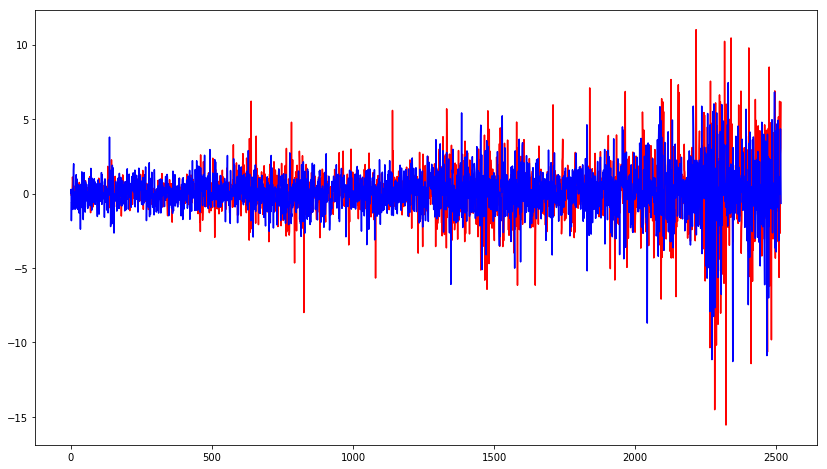

In [658]:
plt.figure(figsize=(14,8))
plt.plot(range(len(data['AAPL'])), data['AAPL'], color = 'red')
plt.plot(range(len(predict)), predict, color = 'blue')
plt.show()

ARIMA Model

In [532]:
from statsmodels.tsa.arima_model import ARIMA

In [573]:
data2 = data_sta

In [583]:
number = len(data_sta.columns)
numrow = len(data_sta)
forecast = pd.DataFrame()
for i in range(66):
   # Set Train and Test parameter #
    mean = np.mean(data2.iloc[:,i])
    dat = data2.iloc[:,i]
    per_80 = 2014
    Train = dat[0:per_80]
    Test = dat[per_80:numrow]
    Train = np.nan_to_num(Train, mean)
    Test = np.nan_to_num(Test, mean)
   
    # Train ARIMA model #
    model2 = ARIMA(Train,order=(2, 2, 0))
    result1 = model2.fit()
    
    # Predict data #
    predict = model2.predict(Test)
    
    forecast[data_sta.columns[i]] = predict
    

D:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [585]:
forecast.head(10)

,A,AAL,AAN,AAP,AAPL,AAXN,ABBV,ABC,ABMD,ABT,...,AN,ANET,ANSS,ANTM,AON,AOS,APA,APD,APH,APTV
0,0.019653,-0.195862,-0.925056,-2.431595,0.630524,0.080000,1.078735,0.742485,2.290024,-0.922832,...,-1.049999,0.129990,0.959999,1.220901,0.136795,-0.077648,-0.468330,-0.247375,-0.235397,0.517052
1,0.257129,-0.263834,-1.263812,-7.547264,4.334381,-0.004117,1.263927,0.712853,2.904393,-0.205771,...,-1.568544,0.341372,-1.419985,1.214974,1.132271,0.020859,-3.188866,-0.418374,1.050101,0.840492
2,-0.660271,-0.194023,-1.716360,-7.473008,0.972647,-0.016501,2.114970,0.297758,1.602336,-0.985607,...,-2.325501,0.365271,-4.759025,0.304677,-2.191301,-0.204669,1.100075,-0.489940,-4.160778,1.268183
3,0.175777,-0.180731,-1.716360,-12.505434,-0.139336,0.026000,2.114970,2.236582,0.980007,-0.516415,...,-0.853996,0.365271,-0.572972,27.245435,0.843061,-0.045925,0.571141,-0.332881,3.075311,1.268183
4,0.696670,-0.298605,-1.932257,-11.139945,-0.018010,0.071000,2.114970,1.221676,2.034842,-0.011905,...,-3.433396,0.365271,-0.958014,-5.898253,0.334747,0.362533,-2.881903,0.700600,-0.687004,1.268183
5,-1.390894,-0.229443,-1.362679,-10.525615,0.907476,-0.024500,2.114970,1.839120,1.279836,-1.029197,...,-2.533300,0.365271,-3.177000,10.461851,-1.524980,-0.629144,0.982286,-0.736093,-1.051792,1.268183
6,2.103037,-0.057742,-1.720351,-13.920427,1.346900,0.112000,2.114970,0.267803,0.749687,-0.284775,...,-1.024595,0.365271,0.561004,6.974971,1.523924,0.305739,-0.170657,-0.199520,0.339818,1.268183
7,-1.923634,-0.451433,-1.689940,-15.887554,-0.606728,-0.068500,2.114970,2.700593,2.522860,-0.115325,...,-3.614998,0.365271,-2.736010,15.352852,1.537820,-0.039806,-3.637696,0.821565,1.348468,1.268183
8,0.499250,-0.063321,-1.840356,-6.023332,-0.303231,0.007500,2.114970,0.259819,1.204235,-1.245846,...,-1.879001,0.365271,-0.418991,-3.802773,-3.883923,-0.272055,3.226786,-1.473019,-3.014033,1.268183
9,0.601920,-0.251752,-1.983429,-15.529961,0.791855,0.155000,2.114970,2.167517,0.485285,0.029977,...,-1.439092,0.365271,-3.450013,19.965735,2.573828,0.304817,-3.585094,0.642662,2.035081,1.268183


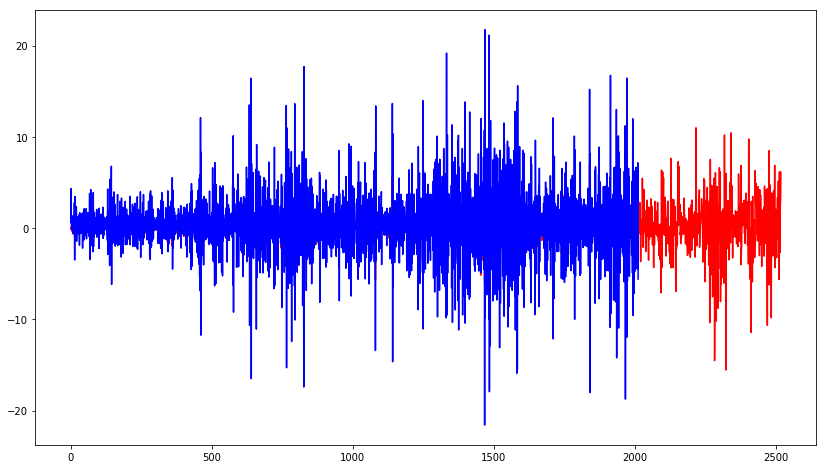

In [653]:
plt.figure(figsize=(14,8))
plt.plot(range(len(data['AAPL'])), data['AAPL'], color = 'red')
plt.plot(range(len(forecast['AAPL'])), forecast['AAPL'], color = 'blue')
plt.show()